In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
import math
style.use("dark_background")
%matplotlib inline

In [2]:
statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

In [3]:
def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    n_qubit = circuit.num_qubits
    circuit.measure([i for i in range(n_qubit)],[i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend=qasm_sim,shots=1024).result()
    counts =qasm_job.get_counts()
    return statevec, counts
    

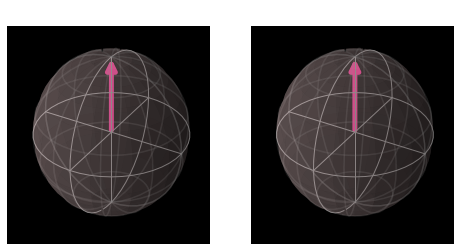

In [4]:
circuit = q.QuantumCircuit(2,2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)


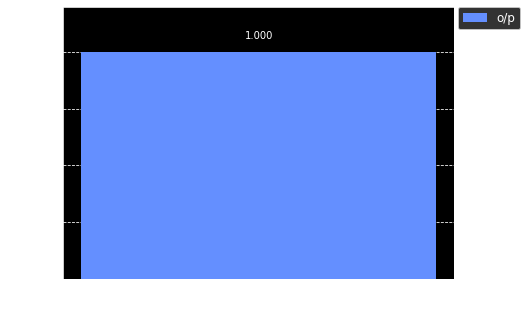

In [5]:
plot_histogram([counts], legend=["o/p"])

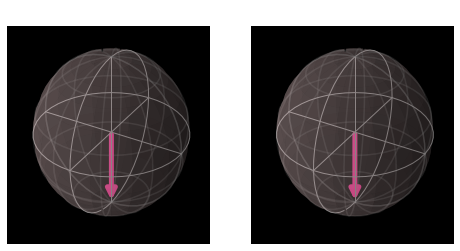

In [6]:
circuit = q.QuantumCircuit(2,2)
# 0 0
circuit.x(0)#not the first qbit
# 1 0
circuit.cx(0,1)#controlled not : not bit two if bit 1 is high
# 1 1
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

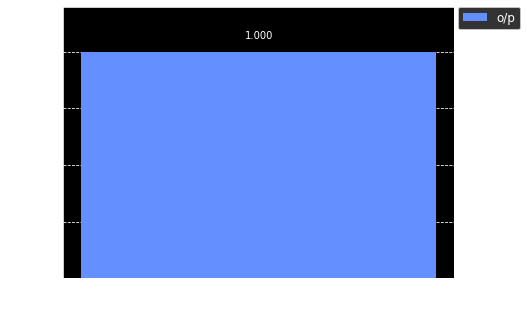

In [7]:
plot_histogram([counts], legend=["o/p"])

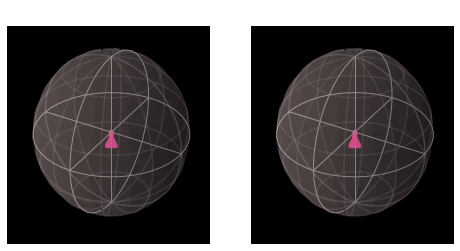

In [8]:
circuit = q.QuantumCircuit(2,2)
# 0 0
circuit.h(0)#not the first qbit
# 1 0
circuit.cx(0,1)#controlled not : not bit two if bit 1 is high
# 1 1
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

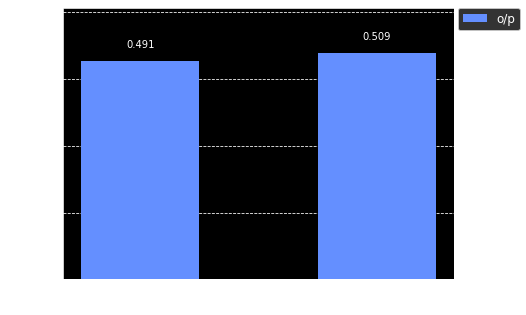

In [9]:
plot_histogram([counts], legend=["o/p"])

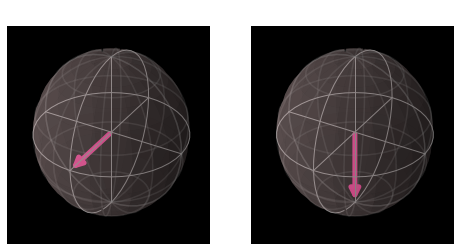

In [10]:
circuit = q.QuantumCircuit(2,2)

circuit.h(0)

circuit.x(1)

statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

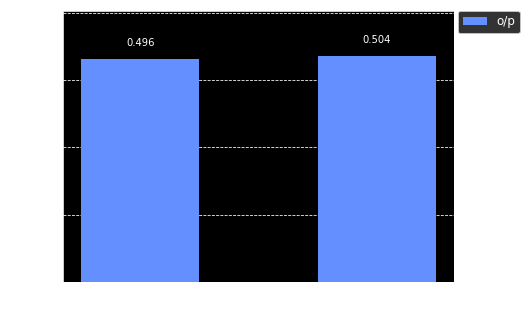

In [11]:
plot_histogram([counts], legend=["o/p"])

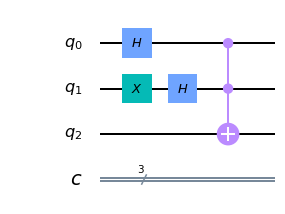

In [12]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw(output="mpl")

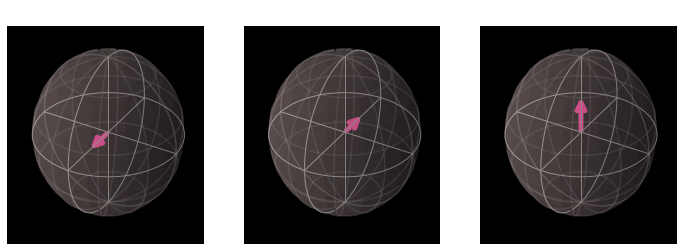

In [13]:
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

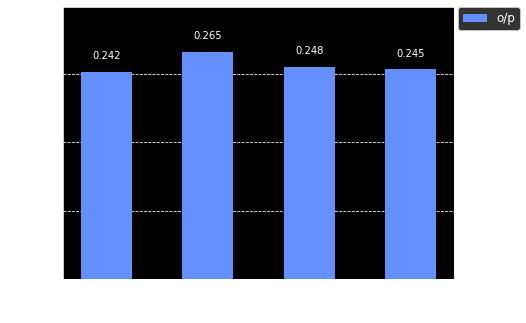

In [14]:
plot_histogram([counts], legend=["o/p"])

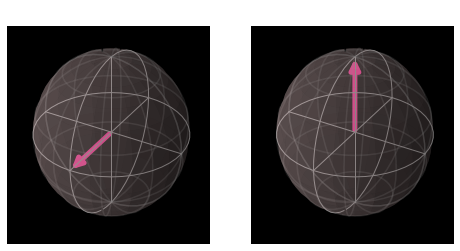

In [15]:
circuit = q.QuantumCircuit(2,2)
# 0 0
circuit.cx(0,1)
circuit.h(0)#not the first qbit

statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

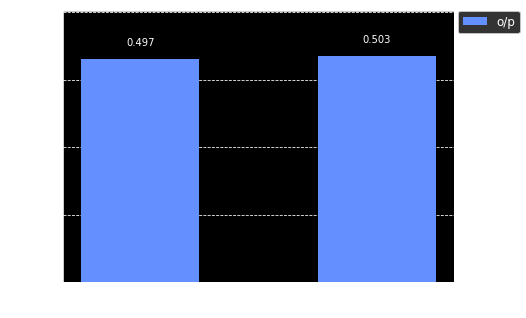

In [16]:
plot_histogram([counts], legend=["o/p"])

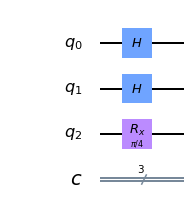

In [17]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4,2)#anticlock wise rotation
circuit.draw(output="mpl")


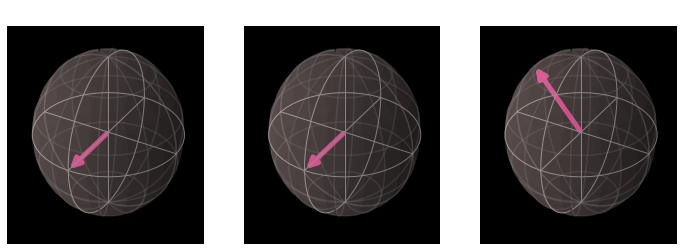

In [18]:
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)


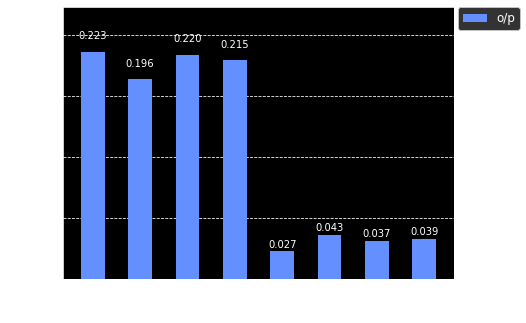

In [19]:
plot_histogram([counts], legend=["o/p"])

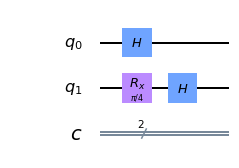

In [20]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)
circuit.rx(math.pi/4,1)#anticlock wise rotation
circuit.h(1)
circuit.draw(output="mpl")


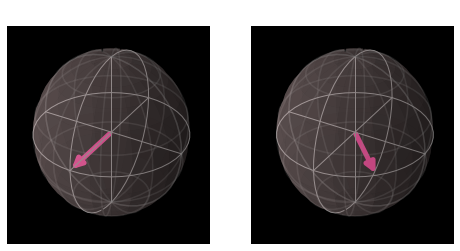

In [21]:
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

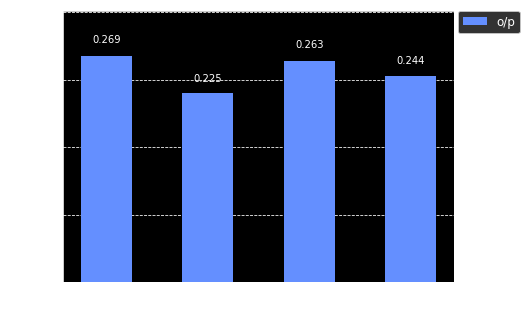

In [22]:
plot_histogram([counts], legend=["o/p"])

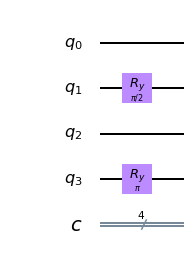

In [23]:
#trying to make a 4bit circuit with 1000 and 1010 as major o/p using rotation only
circuit = q.QuantumCircuit(4,4)
circuit.ry(math.pi,3)
circuit.ry(math.pi/2,1)#anticlock wise rotation

circuit.draw(output="mpl")

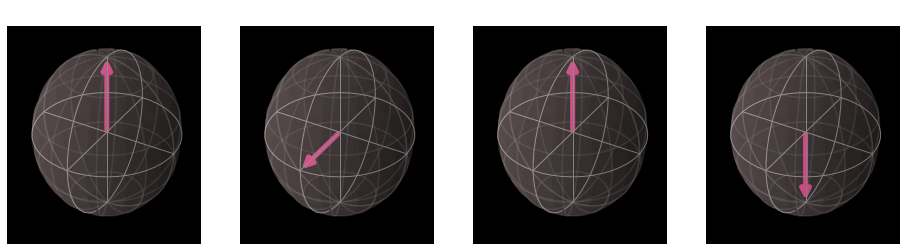

In [24]:
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

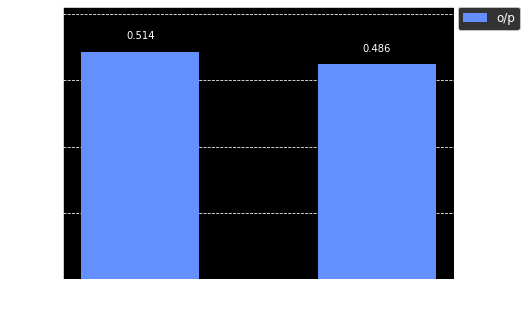

In [25]:
plot_histogram([counts], legend=["o/p"])